**Projeto da disciplina de Data Mining**

**PESC - Programa de Engenharia de Sistemas e Computação**

**COPPE / UFRJ**

Autores: Bernardo Souza e Rafael Lopes Conde dos Reis

GitHub: https://github.com/condereis/credit-card-default/


# Resumo



# Pacotes Utilizados

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# Análise Inicial

In [2]:
train = pd.read_csv('../data/interim/train.csv', index_col=0)
del train.index.name

train.describe()

LIMIT_BAL           SEX     EDUCATION      MARRIAGE           AGE  \
count    21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean    167253.619048      1.604952      1.855857      1.552667     35.503190   
std     129780.577500      0.488873      0.791843      0.522814      9.228798   
min      10000.000000      1.000000      0.000000      0.000000     21.000000   
25%      50000.000000      1.000000      1.000000      1.000000     28.000000   
50%     140000.000000      2.000000      2.000000      2.000000     34.000000   
75%     240000.000000      2.000000      2.000000      2.000000     41.000000   
max    1000000.000000      2.000000      6.000000      3.000000     79.000000   

              PAY_0         PAY_2         PAY_3         PAY_4         PAY_5  \
count  21000.000000  21000.000000  21000.000000  21000.000000  21000.000000   
mean      -0.014762     -0.126048     -0.161429     -0.218476     -0.264190   
std        1.115917      1.192652      1.187919      1.163021      1.127144   
min       -2.000000     -2.000000     -2.000000     -2.000000     -2.000000   
25%       -1.000000     -1.000000     -1.000000     -1.000000     -1.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        8.000000      8.000000      8.000000      8.000000      8.000000   

                  ...                  BILL_AMT4      BILL_AMT5  \
count             ...               21000.000000   21000.000000   
mean              ...               43486.998619   40428.756143   
std               ...               64923.705508   61380.584634   
min               ...             -170000.000000  -81334.000000   
25%               ...                2303.000000    1762.750000   
50%               ...               19128.500000   18104.500000   
75%               ...               55180.250000   50152.250000   
max               ...              891586.000000  927171.000000   

           BILL_AMT6       PAY_AMT1      PAY_AMT2       PAY_AMT3  \
count   21000.000000   21000.000000  2.100000e+04   21000.000000   
mean    39016.284048    5626.162048  5.921240e+03    5197.440190   
std     59878.718183   16900.424260  2.209119e+04   17803.002497   
min   -209051.000000       0.000000  0.000000e+00       0.000000   
25%      1225.750000    1000.000000  8.360000e+02     390.000000   
50%     17143.500000    2100.000000  2.010000e+03    1800.000000   
75%     49311.750000    5005.000000  5.000000e+03    4434.250000   
max    961664.000000  873552.000000  1.227082e+06  896040.000000   

            PAY_AMT4       PAY_AMT5       PAY_AMT6  default.payment.next.month  
count   21000.000000   21000.000000   21000.000000                21000.000000  
mean     4801.393095    4813.631476    5194.864476                    0.222429  
std     16209.299180   15537.652308   18015.660988                    0.415887  
min         0.000000       0.000000       0.000000                    0.000000  
25%       282.000000     234.000000     116.000000                    0.000000  
50%      1500.000000    1500.000000    1500.000000                    0.000000  
75%      4000.000000    4006.000000    4000.000000                    0.000000  
max    621000.000000  426529.000000  528666.000000                    1.000000  

[8 rows x 24 columns]

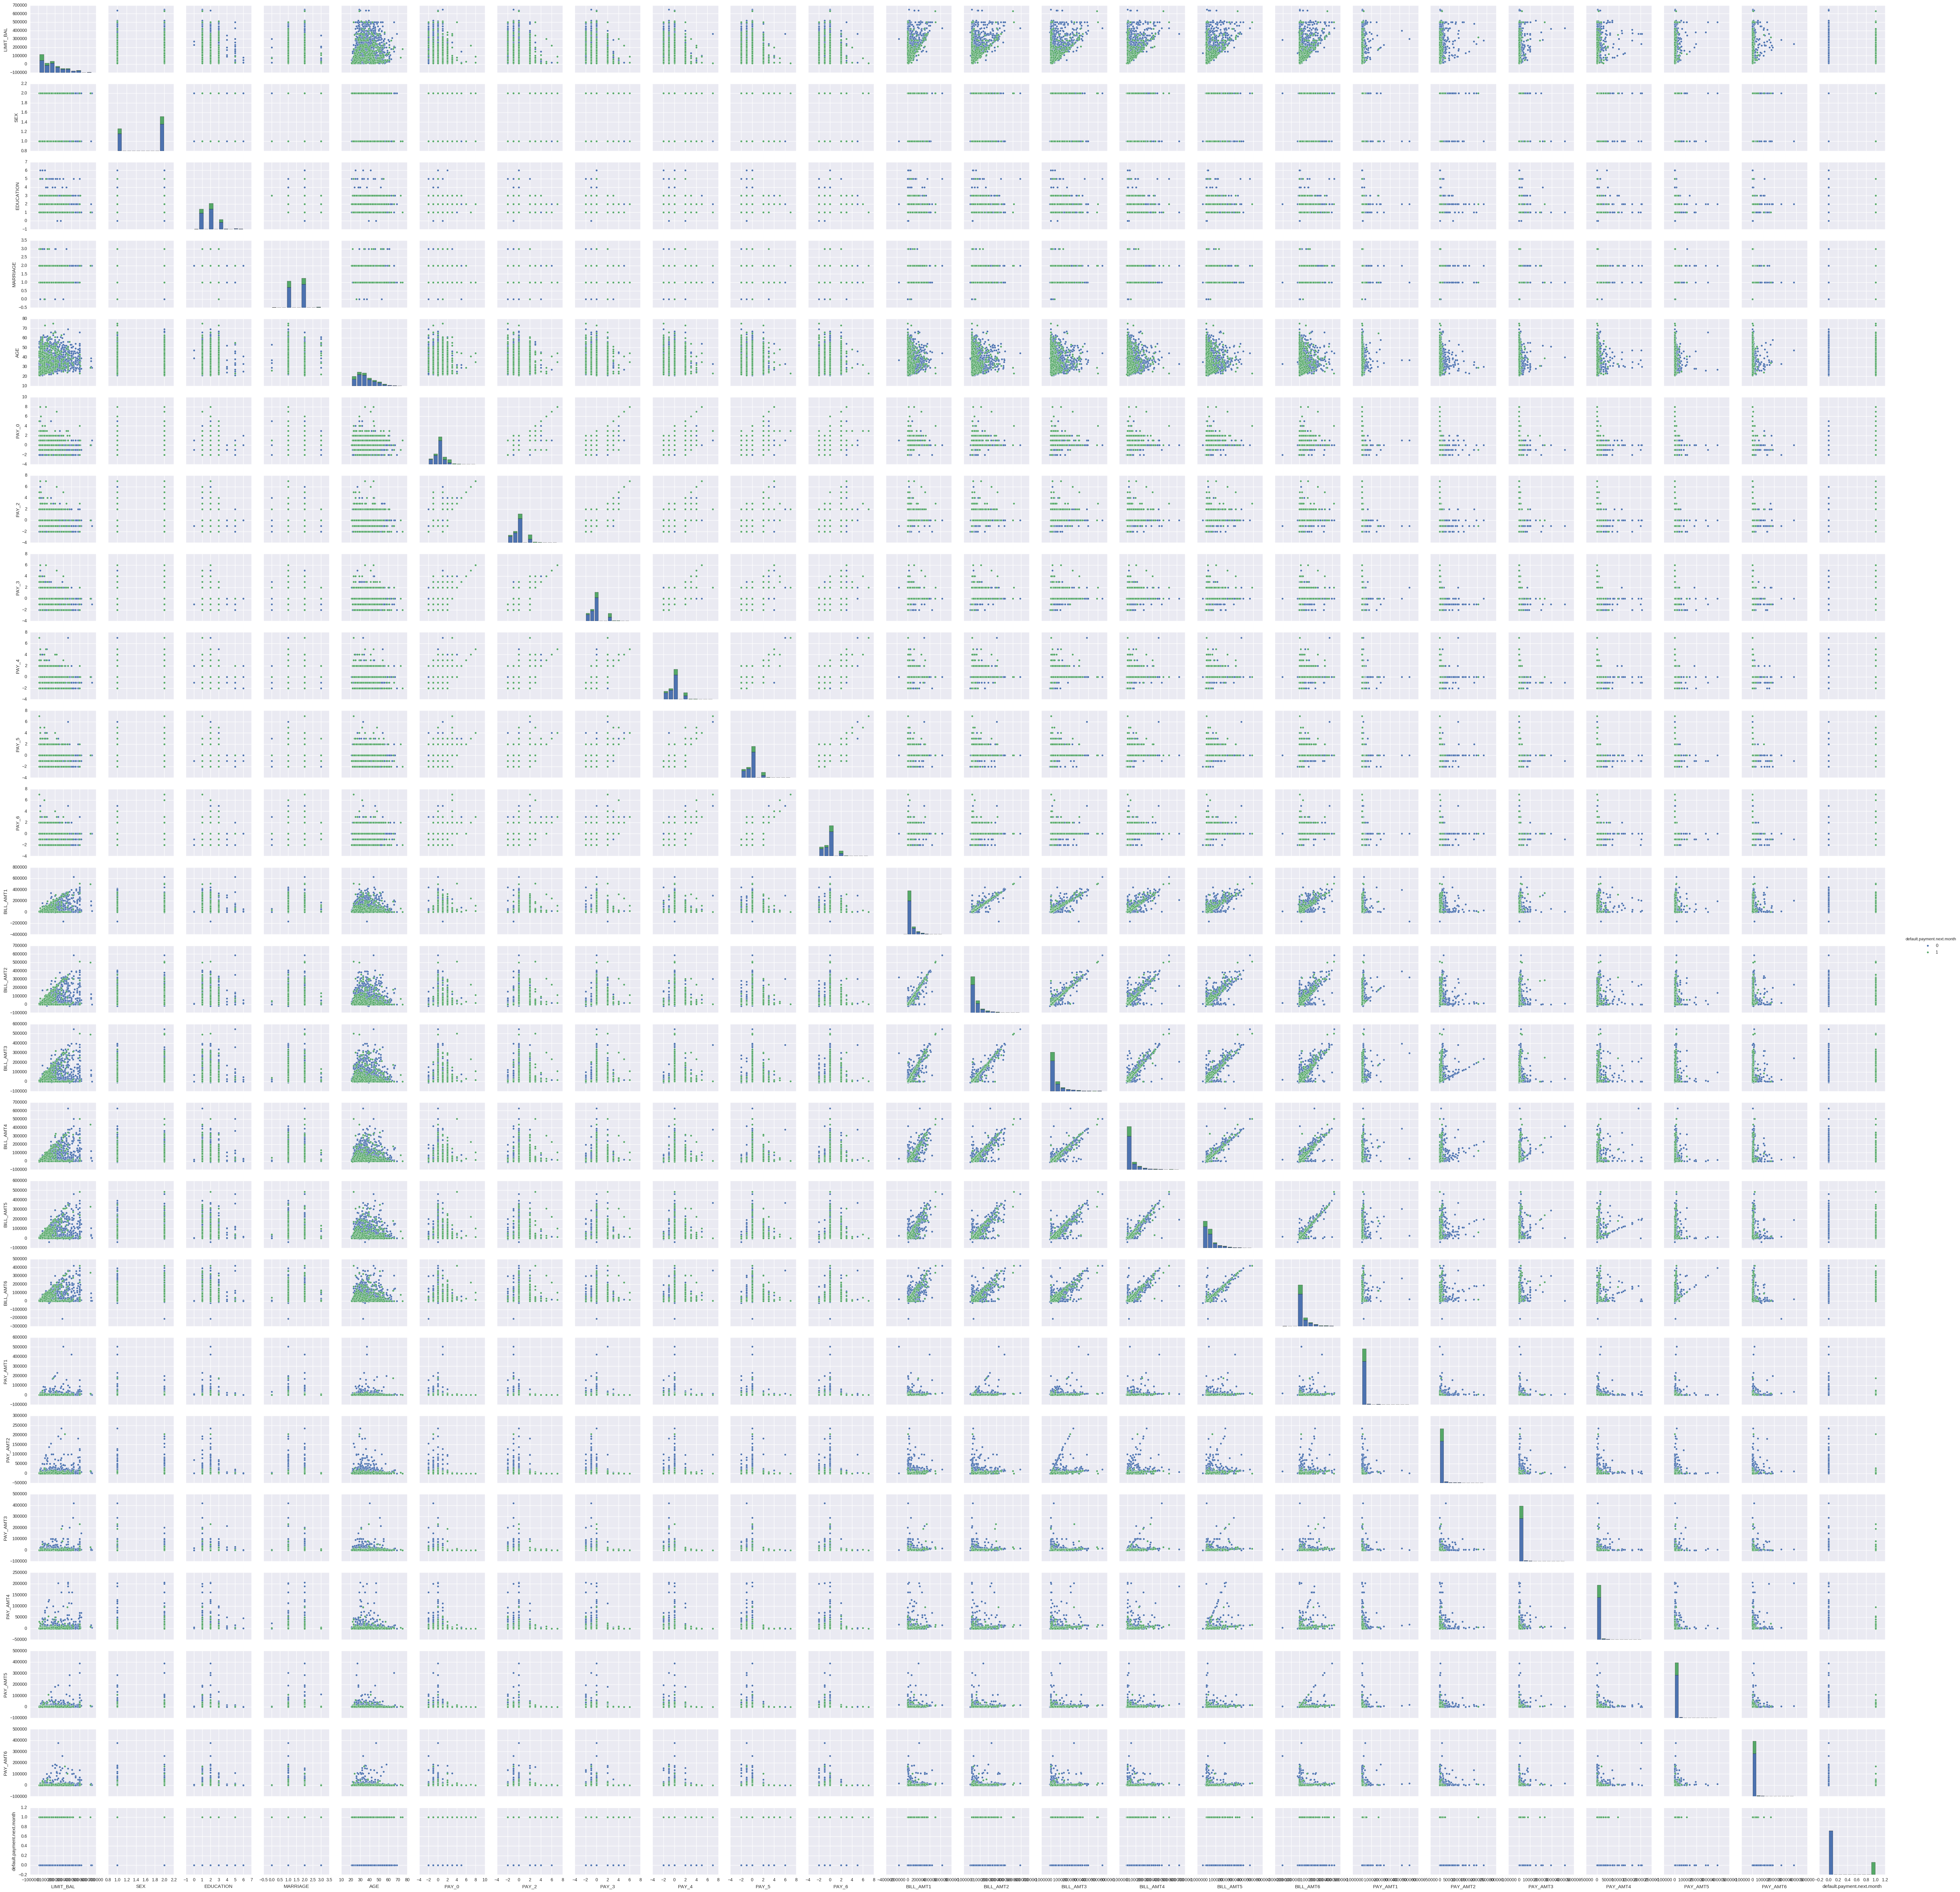

In [3]:
sns.pairplot(train.sample(frac=0.1), diag_kind="hist", hue='default.payment.next.month')

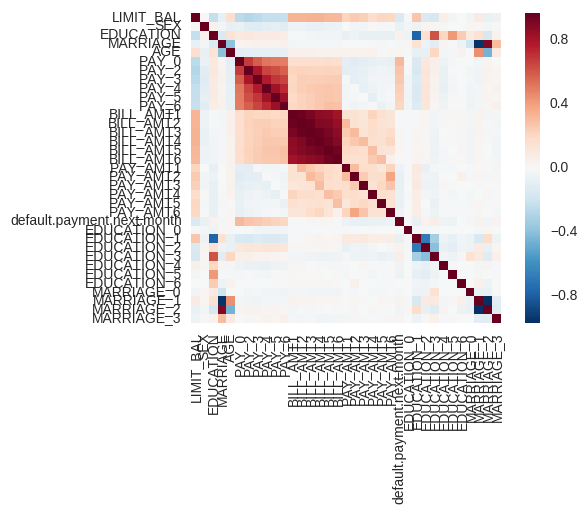

In [3]:
ed_dummies = pd.get_dummies(train['EDUCATION'], prefix='EDUCATION')
mar_dummies = pd.get_dummies(train['MARRIAGE'], prefix='MARRIAGE')
train = pd.concat([train, ed_dummies, mar_dummies], axis=1)      

corrmat = train.sample(frac=0.1).corr()
sns.heatmap(corrmat, vmax=.8, square=True)

# Variáveis mais Correlacionadas com o Pagamento

## Valor do Empréstimo

É possível observar, a partir dos plots abaixo, que a distribuição dos casos onde foi efetuado o pagamento possui um valor de crédito mais alto do que naqueles onde ouve default. Pode-se cogitar que valores mais baixos podem apresentar maior risco de não pagamento, caso levemos apenas esta relação em consideração.

O primeiro é um boxplot, no qual podemos ver que a linha da mediana no caso de não pagamento se encontra abaixo da mediana no caso de pagamento. Isso é confirmado, a seguir pelos histogramas, onde o histograma de default se encontra acima do de pagamento para valores mais baixos de emprestimo e o oposto para valores mais altos. O ultimo mostra a taxa de não pagamento em cada quartil de empréstimo. Este último mostra mais explicitamente a dependencia do valor do empréstimo na taxa de não pagamento.

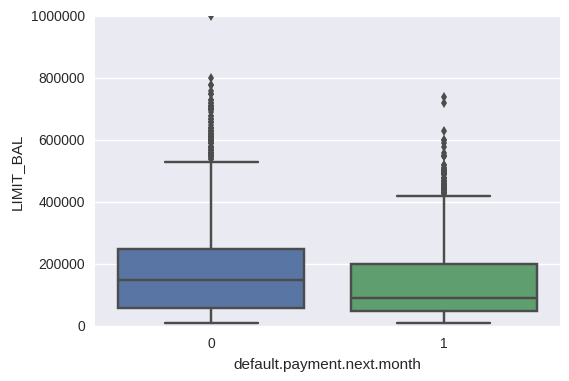

In [52]:
sns.boxplot(x='default.payment.next.month', y='LIMIT_BAL', data=train);

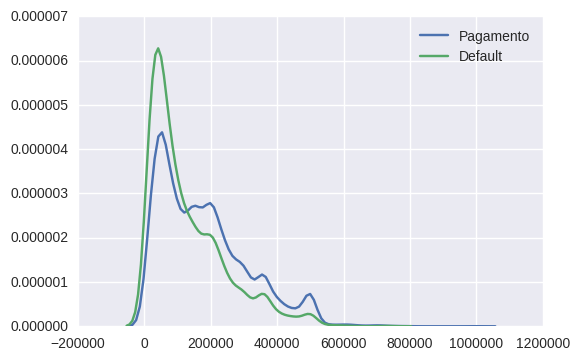

In [5]:
sns.kdeplot(train[train['default.payment.next.month']==0].LIMIT_BAL, label='Pagamento')
sns.kdeplot(train[train['default.payment.next.month']==1].LIMIT_BAL, label='Default')

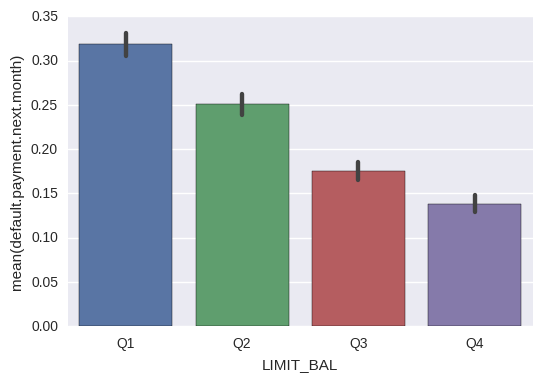

In [79]:
categorical_limit_bal = pd.cut(train.LIMIT_BAL, [0,50000,140000,240000,1000000], labels=["Q1","Q2","Q3","Q4"])
sns.barplot(x=categorical_limit_bal, y=train['default.payment.next.month']);

## Atraso no pagamento

É possível observar algo estranho nos dados PAY_x. Segundo a descrição do problema ela deveria ter apenas valores maiores que 1 referentes ao atraso e caso não tivesse havido atraso o valor da variável seria -1. Podemos observar os valores -2 e 0 nos dados, que, a princípio não eram esperados. 

Como foi observado no gráfico de correlação entre variáveis notamos que as variáveis PAY_0 - PAY_6 são fortemente correlacionadas entre sí, portando analisamos abaixo apenas PAY_0 que, dentre elas, é a mais correlacionada com a saída.

Observamos que os valores -2 a 0 tem uma taxa de default muito menor do que dos demais valores. Como era possível esperar pessoas que com um grande atraso no pagamento tem uma taxa muita maior de default no próximo mês do que aquelas que tem os pagamentos em dia. A distribuição para os valores de atraso mostra que 0 é o valor mais frequente.

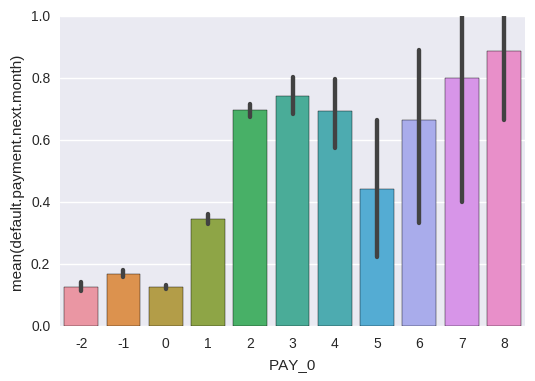

In [82]:
sns.barplot(x='PAY_0', y='default.payment.next.month', data=train);

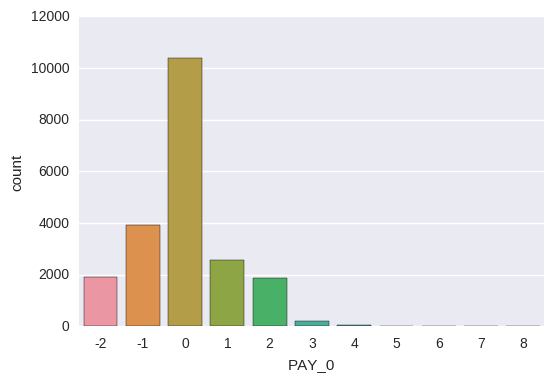

In [113]:
sns.countplot(x=train.PAY_0);

# Escolaridade

Observamos no plot abaixo que university, graduate e high school são as classes mais representativas, respectivamente. Já o plote sequinte mostra que o valor médio da ocorrência de pagamento para cada categoria de escolaridade. Podemos observar que a taxa de ocorrencia de default é menor quento maior o grau de escolaridade.

(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


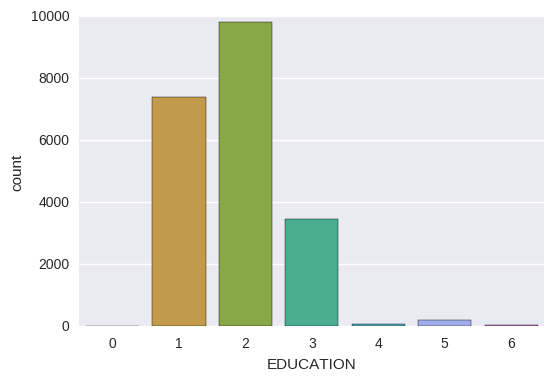

In [49]:
sns.countplot(train.EDUCATION)
print '(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


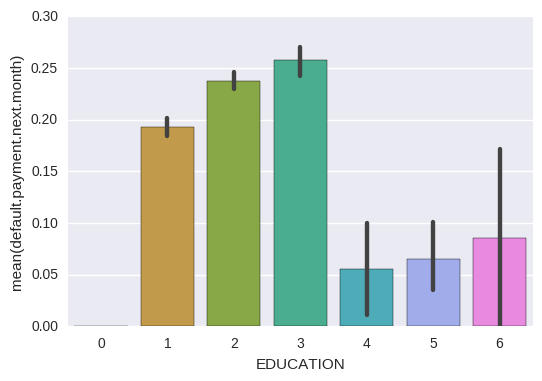

In [50]:
sns.barplot(x='EDUCATION', y='default.payment.next.month', data=train);
print '(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


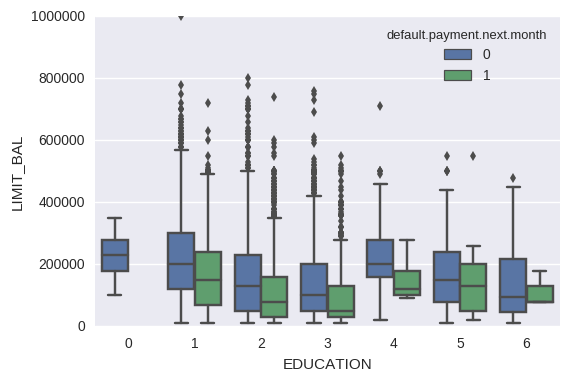

In [51]:
sns.boxplot(x='EDUCATION', y='LIMIT_BAL', hue='default.payment.next.month', data=train);
print '(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)


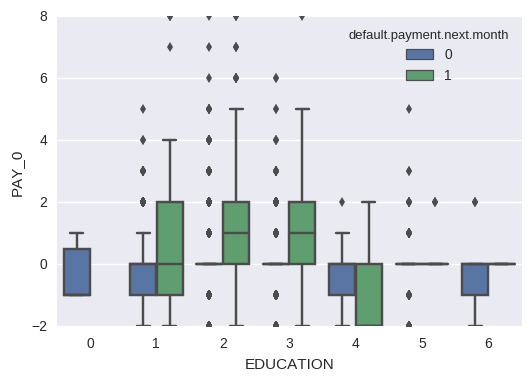

In [54]:
sns.boxplot(x='EDUCATION', y='PAY_0', hue='default.payment.next.month', data=train);
print '(0=unknown, 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)'

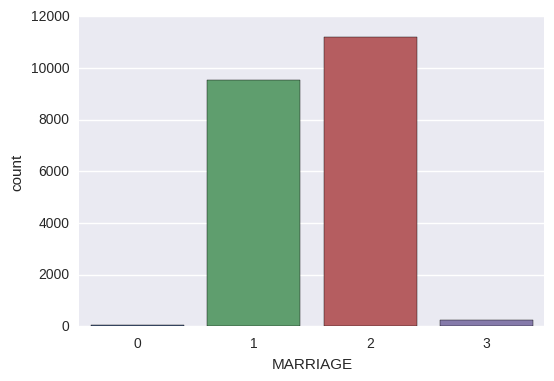

In [45]:
sns.countplot(train.MARRIAGE)

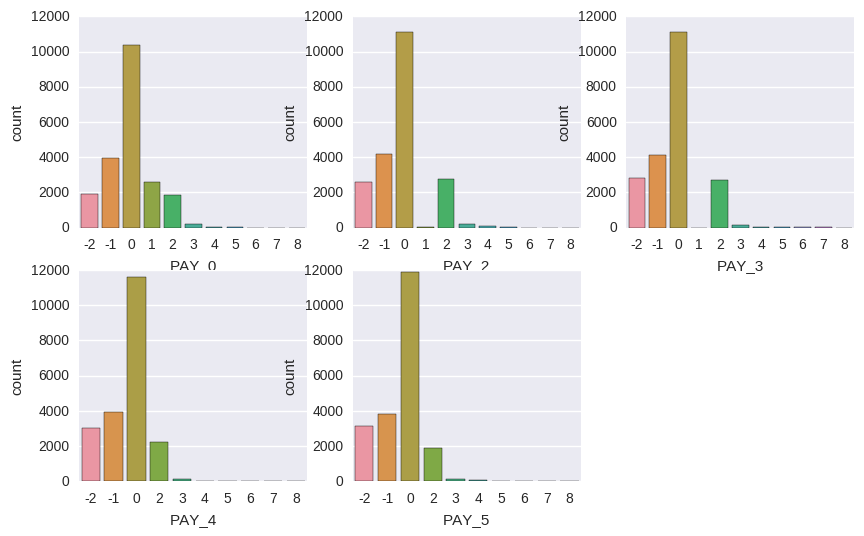

In [53]:
plt.figure(1, figsize=(10, 6))
plt.subplot(231)
sns.countplot(train.PAY_0)
plt.subplot(232)
sns.countplot(train.PAY_2)
plt.subplot(233)
sns.countplot(train.PAY_3)
plt.subplot(234)
sns.countplot(train.PAY_4)
plt.subplot(235)
sns.countplot(train.PAY_5)

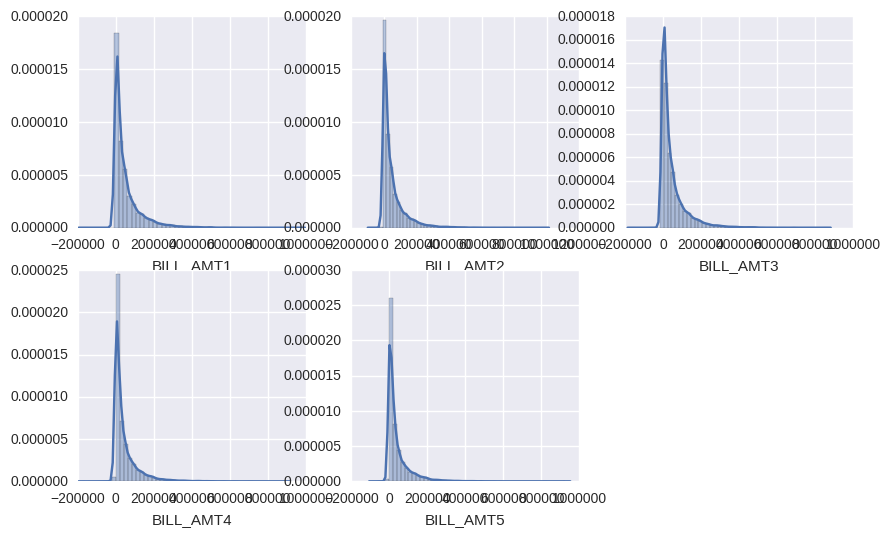

In [33]:
plt.figure(1, figsize=(10, 6))
plt.subplot(231)
sns.distplot(train.BILL_AMT1)
plt.subplot(232)
sns.distplot(train.BILL_AMT2)
plt.subplot(233)
sns.distplot(train.BILL_AMT3)
plt.subplot(234)
sns.distplot(train.BILL_AMT4)
plt.subplot(235)
sns.distplot(train.BILL_AMT5)

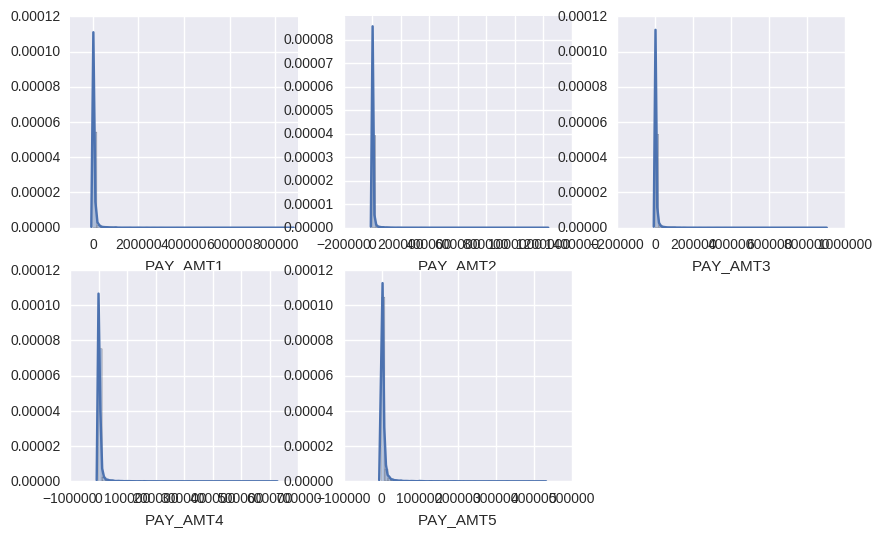

In [34]:
plt.figure(1, figsize=(10, 6))
plt.subplot(231)
sns.distplot(train.PAY_AMT1)
plt.subplot(232)
sns.distplot(train.PAY_AMT2)
plt.subplot(233)
sns.distplot(train.PAY_AMT3)
plt.subplot(234)
sns.distplot(train.PAY_AMT4)
plt.subplot(235)
sns.distplot(train.PAY_AMT5)